In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
x_train = torch.tensor([[1.0], [0.0]])
y_train = torch.tensor([[0.0], [1.0]])

In [3]:
class NotOperatorNN:
	def __init__(self):
		self.W = torch.tensor([[1.0]], requires_grad=True)
		self.b = torch.tensor([[1.0]], requires_grad=True)
	
	def f(self, x):
		return torch.sigmoid(x @ self.W + self.b)

	def logit(self, x):
		return (x @ self.W + self.b)

	def loss(self, x, y):
		# return -torch.mean(torch.multiply(y, torch.log(self.f(x))) + torch.multiply((1-y), torch.log(1 - self.f(x))))
		return torch.nn.functional.binary_cross_entropy_with_logits(self.logit(x), y)

In [4]:
model = NotOperatorNN()
optimizer = torch.optim.SGD([model.W, model.b], lr=10)

In [5]:
for epoch in range(10000):
	model.loss(x_train, y_train).backward()
	optimizer.step()
	optimizer.zero_grad()

In [6]:
print(f'W = {model.W}, b = {model.b}, loss = {model.loss(x_train, y_train)}')

W = tensor([[-19.8481]], requires_grad=True), b = tensor([[9.7214]], requires_grad=True), loss = 4.994739720132202e-05


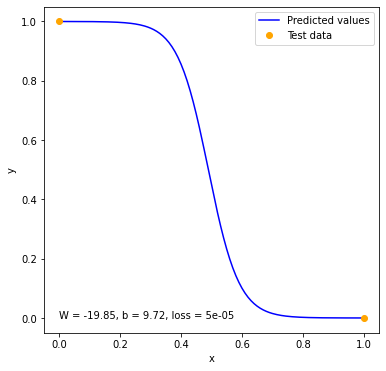

In [7]:
plt.figure(figsize=(6,6))
plt.xlabel('x')
plt.ylabel('y')

x = torch.arange(0, 1, .005).reshape(-1,1)
y = model.f(x).detach()

plt.plot(x, y, c='b', label='Predicted values')
plt.plot(x_train.detach(), y_train.detach(), 'o', c='orange', label='Test data')
plt.text(0,0, f'W = {round(model.W.item(),2)}, b = {round(model.b.item(),2)}, loss = {round(model.loss(x_train, y_train).item(),5)}')
plt.legend()
plt.show()